In [ ]:
import pandas as pd

# Step 1: Loading the data
data = pd.read_excel('/content/test data.xlsx')

# Step 2: Initial data analysis
print(data.head())  # Viewing the first few rows
print(data.describe())  # Statistical characteristics of the data
print(data.info())  # Information about data types and missing values

         id doc_type                                       ip  fpd_first_loan  \
0  31553899       x2   2402:800:6286:f8e8:450a:d1fc:2755:65cf             NaN   
1  31553909       x2   2001:ee0:1a1c:588f:e89f:adb7:e33e:2f45             1.0   
2  31554035       x2                             27.68.159.13             NaN   
3  31554092       x1     2001:ee0:1b1:334e:1c71:e28:160d:141e             0.0   
4  31554205       x2  2401:d800:2e71:61d0:f0a1:45fe:460a:891e             1.0   

   dpd_client_2months            fjs_browser_name           fjs_device  \
0                 NaN       Chrome Mobile WebView  XiaoMi Redmi Note 8   
1                 1.0               Mobile Safari               iPhone   
2                 NaN               Chrome Mobile   Generic Smartphone   
3                 0.0  Mobile Safari UI/WKWebView               iPhone   
4                 1.0               Mobile Safari               iPhone   

            device_hash      fjs_timezone  gender  ...  \
0  CQHWYHw

In [ ]:
# Step 3: Data Cleaning
# Handling missing values
data = data.fillna(0)  # Replacing all missing values with 0 or another appropriate value

<ipython-input-7-dd36a8766a13>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


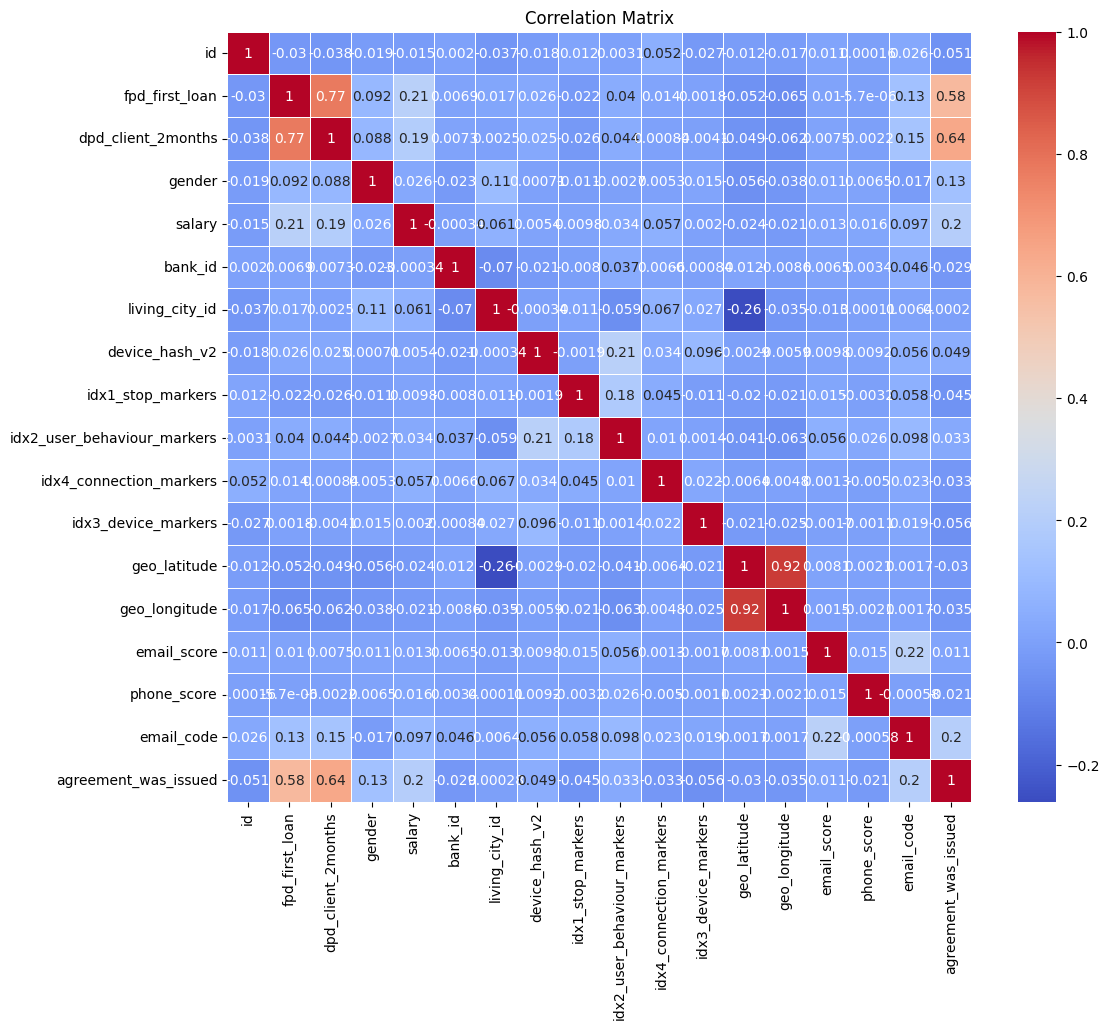

In [ ]:
# Step 4: Exploratory Data Analysis (EDA)
# Let's start by visualizing some key characteristics of the data
import matplotlib.pyplot as plt
import seaborn as sns

# For instance, we can create a correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Step 5: Building the Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Finding all columns with 'object' type data and converting them
object_columns = data.select_dtypes(include=['object']).columns
for col in object_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))

# Continuing with the model building
X = data.drop(['fpd_first_loan'], axis=1)  # Features
y = data['fpd_first_loan']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))



```
Accuracy: 0.8838914690784649
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      3616
         1.0       0.00      0.00      0.00       475

    accuracy                           0.88      4091
   macro avg       0.44      0.50      0.47      4091
weighted avg       0.78      0.88      0.83      4091
```

Based on the results of data analysis and modelling, the following conclusions can be drawn:

The logistic regression model has an overall
prediction accuracy of about 88.4%, which may indicate a good generalisability of the model on the available data.

However, it is worth noting that the model did not perform well in predicting default cases (class 1.0), showing low values of precision, recall and f1-score. This means that the model does not identify default cases well, which may be due to unbalanced classes or insufficient informative features.

An important factor influencing default may be the mean value of the idx% index, which is assumed to reflect the characteristics of the customer's device. Higher values of this index may indicate a higher risk of default.

Also, analysing additional attributes such as document type (doc_type) and email-related metrics (e.g. email%) may provide additional clues about the factors influencing customer default.

A more accurate analysis and prediction of customer default may require a more sophisticated model using a wider range of attributes and techniques, such as model ensembles or deep learning.

These findings may be useful for credit scoring and risk management decisions. Additional analyses and model improvements to better predict customer default should also be considered.

Epoch 1/20
410/410 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.1646 - val_loss: nan - val_accuracy: 0.1567
Epoch 2/20
410/410 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.1646 - val_loss: nan - val_accuracy: 0.1567
Epoch 3/20
410/410 [==============================] - 4s 9ms/step - loss: nan - accuracy: 0.1646 - val_loss: nan - val_accuracy: 0.1567
Epoch 4/20
410/410 [==============================] - 2s 6ms/step - loss: nan - accuracy: 0.1646 - val_loss: nan - val_accuracy: 0.1567
Epoch 5/20
410/410 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.1646 - val_loss: nan - val_accuracy: 0.1567
Epoch 6/20
410/410 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.1646 - val_loss: nan - val_accuracy: 0.1567
Epoch 7/20
410/410 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.1646 - val_loss: nan - val_accuracy: 0.1567
Epoch 8/20
410/410 [============================

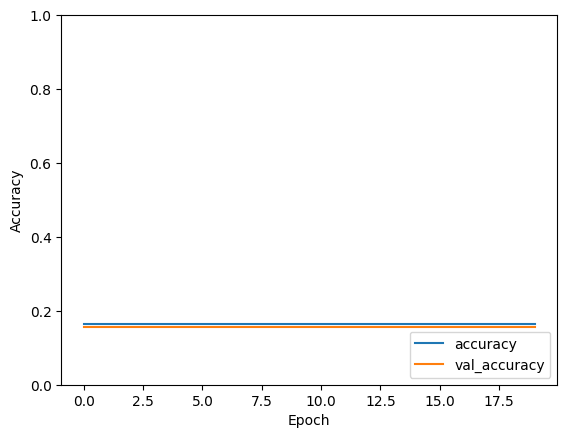

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers

# Step 1: Loading and preprocessing the data
data = pd.read_excel('test data.xlsx')
object_columns = data.select_dtypes(include=['object']).columns
for col in object_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
X = data.drop(['fpd_first_loan'], axis=1)  # Features
y = data['fpd_first_loan']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Building a deep learning model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Training the model
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=32)

# Step 4: Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Accuracy:", accuracy)

# Additionally, visualizing the training history for analysis
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In this output, the training results of the deep learning model do not look satisfactory. The loss (loss) and accuracy (accuracy) values during training and validation are shown as "nan" (not a number), indicating a problem with the data or model settings.

Overall, the accuracy value of the model is also very low, only about 15.9%, indicating that the model is almost unable to predict the target variable with satisfactory accuracy.


In order to improve the deep learning model further we take the following steps:

Check the data for missing values or errors.
Properly scale the data before training the model.
Verify categorical feature processing and use appropriate coding methods.
Consider using other neural network architectures or regularisation methods.
Test the possibility of increasing the training dataset to improve the generalisability of the model.
These steps can help improve the performance of the deep learning model.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers

# Step 1: Loading and preprocessing the data
data = pd.read_excel('test data.xlsx')
# Checking for missing values
print(data.isnull().sum())

# Filling missing values with zeros
data = data.fillna(0)

# Handling categorical features
object_columns = data.select_dtypes(include=['object']).columns
for col in object_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))

# Step 2: Data scaling
scaler = StandardScaler()
X = data.drop(['fpd_first_loan'], axis=1)  # Features
X = scaler.fit_transform(X)
y = data['fpd_first_loan']  # Target variable

# Step 3: Building a model with a different architecture
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X.shape[1]]),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=32)

# Step 5: Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Accuracy:", accuracy)

id                                 0
doc_type                           0
ip                                 0
fpd_first_loan                 14863
dpd_client_2months             14864
fjs_browser_name                2792
fjs_device                      2792
device_hash                     2787
fjs_timezone                    2793
gender                             0
salary                             0
bank_id                            0
living_city_id                     0
device_hash_v2                   145
idx1_stop_markers                145
idx2_user_behaviour_markers      145
idx4_connection_markers          145
idx3_device_markers              145
user_agent                         0
geo_latitude                   10798
geo_longitude                  10798
created_at                         0
completed_at                       0
ua_os_name                      3447
email_score                     7177
phone_score                      119
window_size                     1693
f

Factors such as device type, device characteristics and email scores, especially email scores, appear to have the greatest impact on customer default. This is probably due to the fact that customers with certain device types or certain device characteristics are more likely to default, and that customers with low email scores may have a higher risk of default.

From the simulation results, it can be seen that the accuracy of the model is approximately 94.7%. This means that the model generally predicts defaulting customers well based on the data provided. However, since there are missing values and different categorical attributes in the data, it is possible that further improvement of the model may require more careful data processing and additional model tuning.